In [1]:
import tensornetwork as tn
import numpy as np
import matplotlib.pyplot as plt

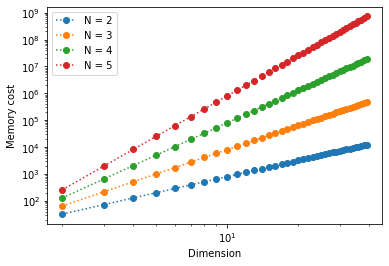

In [3]:
def create_tensor(dimension, rank):
  '''Constructs a tensor of a given rank with random integers'''
  dim_list = tuple([dimension for _ in range(rank)])
  return np.random.random_sample(dim_list)

ranks = range(2,6)
dimensions = range(2,40)

for rank in ranks:
  memory = []
  for dim in dimensions:
      tensor = create_tensor(dim, rank)
      component = tuple(np.random.randint(0, dim, rank))
      memory.append(np.sum([x.nbytes for x in tensor]))
      data = tensor[component]
  plt.loglog(dimensions, memory,'o',ls=':', label = f'N = {rank}')

plt.legend()
plt.xlabel('Dimension')
plt.ylabel('Memory cost')
plt.show()

In [5]:
# Retrieving a component

def block(*dimensions):
  '''Construct a new matrix for the MPS with random numbers from 0 to 1'''
  size = tuple([x for x in dimensions])
  return np.random.random_sample(size)

def create_MPS(rank, dimension, bond_dim):
  '''Build the MPS tensor'''
  mps = [
      tn.Node( block(dim, bond_dim) )] + \
      [tn.Node( block(bond_dim, dim, bond_dim)) for _ in range(rank-2)] + \
      [tn.Node( block(bond_dim, dim) )
      ]

  #connect edges to build mps
  # conn=mps[0][1]^mps[1][0]
  # for k in range(1,rank-1):
  #     conn=mps[k][2]^mps[k+1][0]
  #     connected_edges.append(conn)
  connected_edges = [mps[k].edges[2] ^ mps[k+1].edges[0] for k in range(-1,rank-1)]

  return mps, connected_edges

mps, edges = create_MPS(3, 2, 3)
rel = tn.contractors.auto(mps, ignore_edge_order=True)

print(rel)

IndexError: list index out of range

In [32]:
mps_test = tn.FiniteMPS.random(
    d = [1,1,1],
    D = [3,3],
    dtype = np.int32
)

nodes = [tn.Node(tensor,f'block_{i}') for i,tensor in enumerate(mps_test.tensors)]
# connected_bonds = [nodes[k].edges[2] ^ nodes[k+1].edges[0] for k in range(-1,3-1)]
# connected_bonds = [nodes[-1].edges[2] ^ nodes[0].edges[0]]

# rel = tn.contractors.auto([nodes[-1],nodes[0]], ignore_edge_order=True)
# print(rel.shape)

In [45]:
# for i in range(3):
def create_tensor(dimension, rank):
  '''Constructs a tensor of a given rank with random integers'''
  dim_list = tuple([dimension for _ in range(rank)])
  return np.random.random_sample(dim_list)

mps_try = tn.FiniteMPS(
    [create_tensor(2,3)]
)

nodes_try = [tn.Node(tensor,f'block_{i}') for i,tensor in enumerate(mps_try.tensors)]


In [46]:
nodes_try[0].shape

(2, 2, 2)

In [ ]:
dimensions = range(2,9,2)
MPS_ranks = range(2,150)
MPS_memory = []

for dim in dimensions:
    bond_dim = 2
    MPS_memory = []
    for i in range(len(MPS_ranks)):
        rank = MPS_ranks[i]

        # Creating the MPS state:
        ##################################################################
        mps_nodes, mps_edges = create_MPS(rank, dim, bond_dim)
        MPS_memory.append(np.sum([x.tensor.nbytes for x in mps_nodes]))

    # Plot Results
    plt.loglog(MPS_ranks, MPS_memory, 'o',ls=':', label = f'd = {dim}')

plt.legend()
plt.xlabel('Tensor Rank')
plt.ylabel('MPS memory')

plt.show()


In [ ]:
########################################################################
#----- Retrieving a Component from an MPS by Contracting its edges-----#
########################################################################
dim = 2
bond_dim = 2
rank = 3
components=tuple(np.random.randint(0, dim, rank)) #select randomly the components that we will retrieve
print(f'components are: {components}')

mps_nodes, mps_edges = create_MPS(rank, dim, bond_dim)
for k in range(len(mps_edges)):
    A = tn.contract(mps_edges[k])

#the last node now has all the edges corresponding to the tensor components.

print(f'coefficient of the tensor at the selected components: {A.tensor[components]}')
print(A.get_tensor())

In [ ]:
[1 for _ in range(1)]

In [ ]:
rank = 24
phys_dim = 2
bond_dim = 6

# build the mps:
# the state is canonically normalized when we define the class FiniteMPS
mpstate = tn.FiniteMPS.random(
  d = [phys_dim for _ in range(rank)],
  D = [bond_dim for _ in range(rank-1)],
  dtype = np.float32,
#   canonicalize=True
  )

# connect the edges in the mps and contract over bond dimensions
nodes = [tn.Node(tensor,f'block_{i}') for i,tensor in enumerate(mpstate.tensors)]

connected_bonds = [nodes[k].edges[2] ^ nodes[k+1].edges[0] for k in range(-1,rank-1)]

for x in connected_bonds:
 contracted_node = tn.contract(x) # update for each contracted bond

# evaluate at a desired component
component = tuple(np.random.randint(0,phys_dim,rank))

print(f'Selected components of tensor: {component}')
print(f'Corresponding coefficient of tensor: {contracted_node.tensor[component]}')

In [ ]:
[k for k in range(-1,4)]